In [1]:
#source https://ask.sagemath.org/question/9843/3d-complex-function-plot/

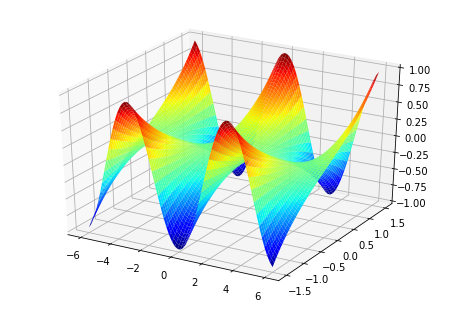

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pylab
import numpy as np
import mpmath
from mpmath import *
mpmath.dps = 5


f = lambda z: np.sin(z).imag

# X, Y = np.meshgrid(X, Y)
# R=np.sin(X + 1j*Y)
# Z=R.real
# T=R.imag


fig = pylab.figure()
ax = Axes3D(fig)
X = np.linspace(-6, 6, 70)
Y = np.linspace(-1.5,1.5,70)
X, Y = np.meshgrid(X, Y)
xn, yn = X.shape
W = X*0
for xk in range(xn):
    for yk in range(yn):
        try:
            z = complex(X[xk,yk],Y[xk,yk])
            w = float(f(z))
            if w != w:
                raise ValueError
            W[xk,yk] = w
        except (ValueError, TypeError, ZeroDivisionError):
            # can handle special values here
            pass

# can comment out one of these
ax.plot_surface(X, Y, W/np.max(W), rstride=1, cstride=1, cmap=cm.jet)
#ax.plot_wireframe(X, Y, W, rstride=5, cstride=5)

pylab.show()

In [14]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-2*3.14, 2*3.14, 0.1)
Y = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(X, Y)
R=np.sin(X + 1j*Y)
Z=R.real
T=R.imag
N = np.abs(T/T.max())  # normalize 0..1
plt.title(' $\mathrm{f(z)=sin(z)}$')
plt.xlabel(' $\mathrm{Re(z)}$')
plt.ylabel(' $\mathrm{Im(z)}$')
surf = ax.plot_surface(
    X, Y, T, rstride=1, cstride=1,
    facecolors=cm.jet(N),
    linewidth=0, antialiased=True, shade=False)
# Colorbar see http://stackoverflow.com/a/6601210
m = cm.ScalarMappable(cmap=cm.jet, norm=surf.norm)
m.set_array(T)
p=plt.colorbar(m)
p.set_label(' $\mathrm{Im(f(z))}$')

fig.set_size_inches(14,7) #http://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
#plt.show() # if you run it as a python script
plt.savefig('test.png')